<p style="color: red; font-size: 40px; font: bolder; text-align: center;">Titanic Servival Prediction</p>

<p style="color: aqua; font: bolder; font-size: 30px;">Import Neccessory Libraires</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<p style="color: aqua; font: bolder; font-size: 30px;">Loading the data</p>

In [11]:
#load my data
file_path=r"C:\Users\Nigatie\Documents\Files Extracted\Practice\pythone\Dataset_Files\Titanic-Dataset.csv"
data=pd.read_csv(file_path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p style="color: aqua; font: bolder; font-size: 30px;">Data PreProcessing</p>

In [12]:
#Know the shape/ the dimension of our data- it have 891 rows and 12 columns
data.shape

(891, 12)

In [13]:
#Getting information about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
#Statisticall analysis of our data -  return columns which have only numerical datatyples
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#How many missing values are there in each column?
data.isnull().sum()  #from three columns have missing values out of 12 columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<p style="color: orange; font: bolder; font-size: 20px;">Handle missing values</p>

In [17]:
#Drop the cabin column which have heavy missing values
drop=data.drop(columns='Cabin', axis=1, inplace=True)
display(data.shape)
data.head()

(891, 11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
#replace the missing values of Age column since it have some missing value, because it is numeric datatype column
data["Age"].fillna(data["Age"].mean(), inplace=True)


C:\Users\Nigatie\AppData\Local\Temp\ipykernel_12824\3254844975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mean(), inplace=True)


In [24]:
#know the mode of Embarked column(it is object data type) to fill the missing value we use mode- most number of repeated values
print(data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [25]:
#Repleacing missing value of "Embarked" column with most repeated value(which is "s")
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data.isnull().sum()

C:\Users\Nigatie\AppData\Local\Temp\ipykernel_12824\930395744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<p style="color: aqua; font: bolder; font-size: 30px;">Data Analysis/ Visualization</p>

In [26]:
#statical analysis
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survived
0    549
1    342
Name: count, dtype: int64

C:\Users\Nigatie\AppData\Local\Temp\ipykernel_12824\3272970295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=data, palette=colors)


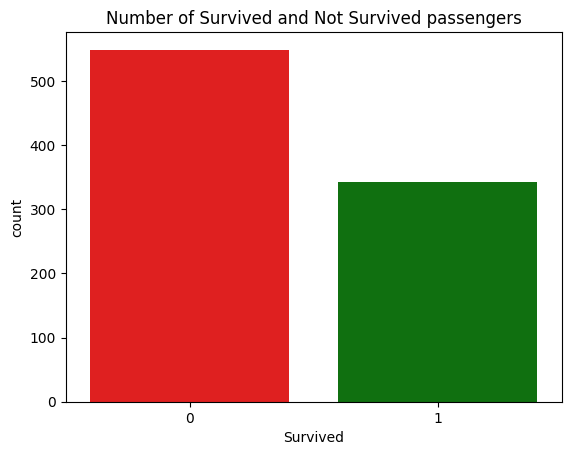

In [39]:
#Know how many people are servived/ it is categorical data which is 0 indicates not servived and 1 indicate number of servived poeple
colors={ "0":'red',
          "1":'green'
         }
display(data["Survived"].value_counts())
sns.countplot(x="Survived", data=data, palette=colors)
plt.title("Number of Survived and Not Survived passengers") 
plt.show()

C:\Users\Nigatie\AppData\Local\Temp\ipykernel_12824\2296003625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=data, palette=sex_Color)


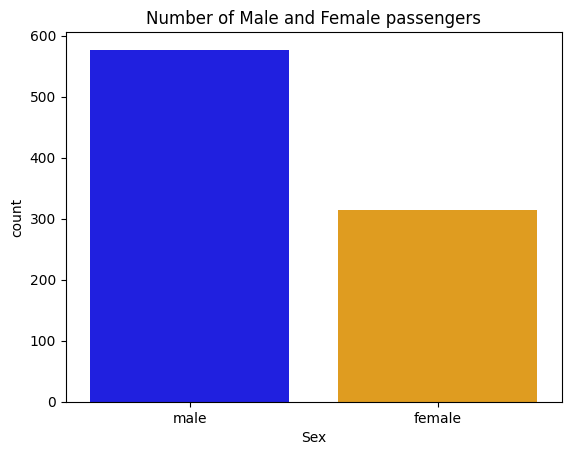

In [38]:
#Visualize how many male and female are there which is important in machine learning for training the model
sex_Color={"male":'blue',
            "female":'orange'
           }
sns.countplot(x="Sex", data=data, palette=sex_Color)
plt.title("Number of Male and Female passengers")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

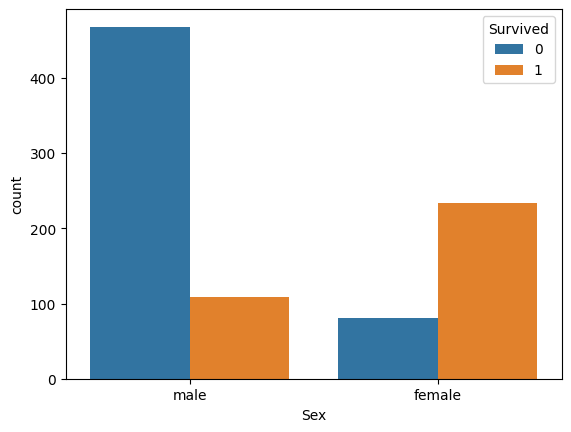

In [40]:
#number of survival probablities based on sex
sns.countplot(x="Sex", hue="Survived", data=data)

<Axes: xlabel='Pclass', ylabel='count'>

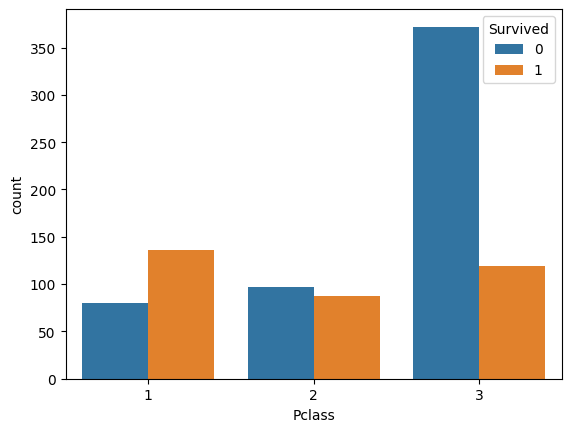

In [41]:
sns.countplot(x="Pclass", hue="Survived", data=data)

<p style="color: orange; font: bolder; font-size: 20px;">Ecoding Categorical Columns</p>

In [45]:
display(data["Sex"].value_counts())
# data["Embarked"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [46]:
#Converting categorical columns in to numerical values using replace funcion for mahchine learning model training

data.replace({"Sex":{"male":0, "female":1}, 
              "Embarked":{"C":0, "S":1, "Q":2}}, 
              inplace=True)
data.head()

C:\Users\Nigatie\AppData\Local\Temp\ipykernel_12824\949174217.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Sex":{"male":0, "female":1},


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1


<p style="color: orange; font: bolder; font-size: 20px;">Separate Target variable and Features</p>

In [49]:
#drop irrelevant features from our features  
# Separate targete variabel and feature variables
x=data.drop(columns=["Survived", "PassengerId", "Name", "Ticket"],axis=1)
y=data["Survived"]

In [50]:
display(x.head())
display(y.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

<p style="color: aqua; font: bolder; font-size: 30px;">Spliting data in to Train data and Test data</p>

In [51]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=5)

In [52]:
#how many obseravations are for train data and for test data
print(x.shape, x_train.shape, x_test.shape, y.shape, y_train.shape)

(891, 7) (712, 7) (179, 7) (891,) (712,)


<p style="color: aqua; font: bolder; font-size: 30px;">Model Training Using Logistic Regression</p>

In [54]:
#Logistic regression is used to train binary categorical Supervised learning-it uses Sigmoid function for prediction
my_model=LogisticRegression()

In [55]:
my_model.fit(x_train, y_train)

c:\Users\Nigatie\Documents\Files Extracted\Practice\pythone\venv311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<p style="color: aqua; font: bolder; font-size: 30px;">Model Evaluation</p>

In [56]:
#Model Evaluation Using accuracy score
x_train_prediction=my_model.predict(x_train)

In [ ]:
print(x_train_prediction)

In [ ]:
accuracy_score_for_Our_model=accuracy_score(y_train, x_train_prediction )
print("The accuracy of my Model is: ", accuracy_score_for_Our_model)

The accuracy of my Model is:  0.7879213483146067


In [60]:
#prediction for x_test data
x_test_prediction=my_model.predict(x_test)

In [61]:
#accuracy score for test data

accuracy_score_test=accuracy_score(y_test, x_test_prediction)

In [62]:
print("The accuracy score for test data is: ", accuracy_score_test)

The accuracy score for test data is:  0.8212290502793296
